# Visualize results of strain profiling with sourmash gather

[Sourmash gather](https://doi.org/10.1101/2022.01.11.475838) compares a query (RNA-seq sample) against a database (GTDB genomes) and provides the minimum set of genomes the cover all of the k-mers in the query that are in the database. This notebook uses the results from the `gather_for_strain.snakefile` and visualizes the composition of each RNA-seq sample.

Two sets of samples are investigated. The first is a curated set of publicly available cystic fibrosis (CF) sputum samples. These samples are recorded in `inputs/metadata.csv`. Given that many studies produced these samples, and that they were produced by different sampling methods, the composition of these samples varies. 

The second set of samples originate from the Hogan lab. *P. aeruginosa* (Pa) was cultured in human CF sputum samples, and then RNA was extracted and sequence. This technique leads a higher proportion of Pa in the samples. Further, this set of samples can be further divided into "metals" and "non-metals." The metals samples originated from cultures that had metals added into the culture, while "non-metals" did not.

In [1]:
setwd("..")

In [2]:
# adjust plot size rendered inline
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)

In [29]:
library(readr)
library(dplyr)
library(purrr)
library(tidyr)
library(tibble)
library(ggplot2)
library(ggpubr)
library(ggthemes)

## functions

In [7]:
read_gather <- function(path){
  gather <- read_csv(path, col_types = "ddddddddcccddddcccd")
}

## read in data

In [8]:
# read in GTDB accession:lineage map for summarizing at species level
gtdb_lineages <- read_csv("https://osf.io/p6z3w/download", show_col_types = F)

In [9]:
files <- c(Sys.glob("outputs/rnaseq_sourmash_gather/*csv"), Sys.glob("outputs/rnaseq_sourmash_gather_spu/*csv"))
gather_results <- files %>%
  map_dfr(read_gather) %>%
  mutate(source = ifelse(grepl(pattern = "X", x = query_name), "public", "hogan lab"),
         exp    = ifelse(grepl(pattern = "_M", x = query_name), "metals",
                         ifelse(grepl(pattern = "X", x = query_name), "public", "non-metals"))) %>% # label sources
  mutate(accession = gsub(" .*", "", name)) %>%
  left_join(gtdb_lineages, by = c("accession" = "ident")) %>%
  mutate(species = ifelse(is.na(species), "human", species))

In [10]:
head(gather_results)

intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,name,filename,⋯,source,exp,accession,superkingdom,phylum,class,order,family,genus,species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1964000,0.5682870,0.29418814,0.56828704,0.869461014,16.624236,2,212.753154,"GCF_001451165.1 Pseudomonas aeruginosa strain=WH-SGI-V-07411, WH-SGI-V-07411",/Users/tr/github/2022-cf-sputum/inputs/sourmash_dbs/gtdb-rs202.genomic.k31.zip,⋯,public,public,GCF_001451165.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__Pseudomonas aeruginosa
884000,0.5450062,0.13688448,0.54500617,0.774431974,6.400452,3,25.807858,"GCF_900406945.1 Pseudomonas aeruginosa strain=KCRI-379A, De novo assembly of KCRI isolate RDK06_379A",/Users/tr/github/2022-cf-sputum/inputs/sourmash_dbs/gtdb-rs202.genomic.k31.zip,⋯,public,public,GCF_900406945.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__Pseudomonas aeruginosa
2246000,0.6308989,0.31912475,0.63089888,0.889500936,7.189671,2,25.641938,"GCF_002330125.1 Pseudomonas aeruginosa strain=env396b, ASM233012v1",/Users/tr/github/2022-cf-sputum/inputs/sourmash_dbs/gtdb-rs202.genomic.k31.zip,⋯,public,public,GCF_002330125.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__Pseudomonas aeruginosa
2016000,0.5662921,0.01198322,0.02247191,0.006169439,1.400000,1,1.044031,"GCF_001451165.1 Pseudomonas aeruginosa strain=WH-SGI-V-07411, WH-SGI-V-07411",/Users/tr/github/2022-cf-sputum/inputs/sourmash_dbs/gtdb-rs202.genomic.k31.zip,⋯,public,public,GCF_001451165.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__Pseudomonas aeruginosa
4804000,0.2866348,0.69967958,0.28663484,0.845091841,29.382598,5,360.105069,"GCF_013912985.1 Pseudomonas aeruginosa strain=PAL1.32, ASM1391298v1",/Users/tr/github/2022-cf-sputum/inputs/sourmash_dbs/gtdb-rs202.genomic.k31.zip,⋯,public,public,GCF_013912985.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__Pseudomonas aeruginosa
4658000,0.2779236,0.07752915,0.02935561,0.021409584,7.268293,3,13.616748,"GCF_900147575.1 Pseudomonas aeruginosa, 431",/Users/tr/github/2022-cf-sputum/inputs/sourmash_dbs/gtdb-rs202.genomic.k31.zip,⋯,public,public,GCF_900147575.1,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__Pseudomonas aeruginosa


## Strain plots

The plots in this section focus on visualizating the exact genomes that were identified in each sample. As can be seen by the last plot in this section, there are sometimes many genome matches in one sample to all of the genomes in the GTDB database. This can happen for two reasons.

1. Many organisms with distinct genomes are present in the sample. This could be because the sample comes from a complex community with many species present, or many strains present from the same species.
2. One genome is present, but we don't have a complete match for this genome within the reference database. When this happens, the genome that overlaps the most with the RNA-seq sample is returned first, all of these matches are subtracted, and then the next best match is returned. This can lead to many strains being detected when many strains are not present.

Given that many genomes can be detected in a single sample, it can be difficult to visualize the genome-level composition of each sample at once. To overcome this, this section focuses on plotting the strains of Pa that were detectable in each sample, as well as the humans sequence in the sample. This strategy works well for the Hogan lab samples, which tend to have fewer observed genomes than the publicly available samples. This strategy did not work well for the publicly available samples, where we see there are too many Pa genomes detected to plot. 

The actual number that is plotted is referred to as `abundance-weighted unique fraction`. By default, `sourmash gather` returns the following information:

+ `intersect_bp`: the estimated number of base pairs that overlapped between the query and the matched genome
+ `f_orig_query`: the fraction of the orginal query (RNA-seq sample) that matched against the genome
+ `f_match`: the fraction of the genome that matched against the original query (RNA-seq sample) 
+ `f_unique_to_query`: the fraction of the matched genome that was _unique_ to the query. Given that multiple matched genomes could cover the same portion of the query, this column reports the fraction of the query that was covered by the a matched genome, but doesn't allow multiple genomes to cover the same portion. As such, the genome that covers the most k-mers in an RNA-seq sample gets to "anchor" those k-mers, while other genomes that _could_ cover those k-mers don't get any of them. This column removes the double counting problem that arises from having multiple genomes in a database that contain some of the same sequences.
+ `f_unique_weighted`: This column weights the `f_unique_to_query` by the abundance of those k-mers. This is important in the context of RNA-seq, as the abudnance reflects the expression of the sequence.

The plots below use `f_unique_weighted` to look at the strain composition of the RNA-seq samples.

In [11]:
gather_results_strain <- gather_results %>%
  mutate(strain_label = ifelse(species %in% c("s__Pseudomonas aeruginosa", "human"), name, "other"))

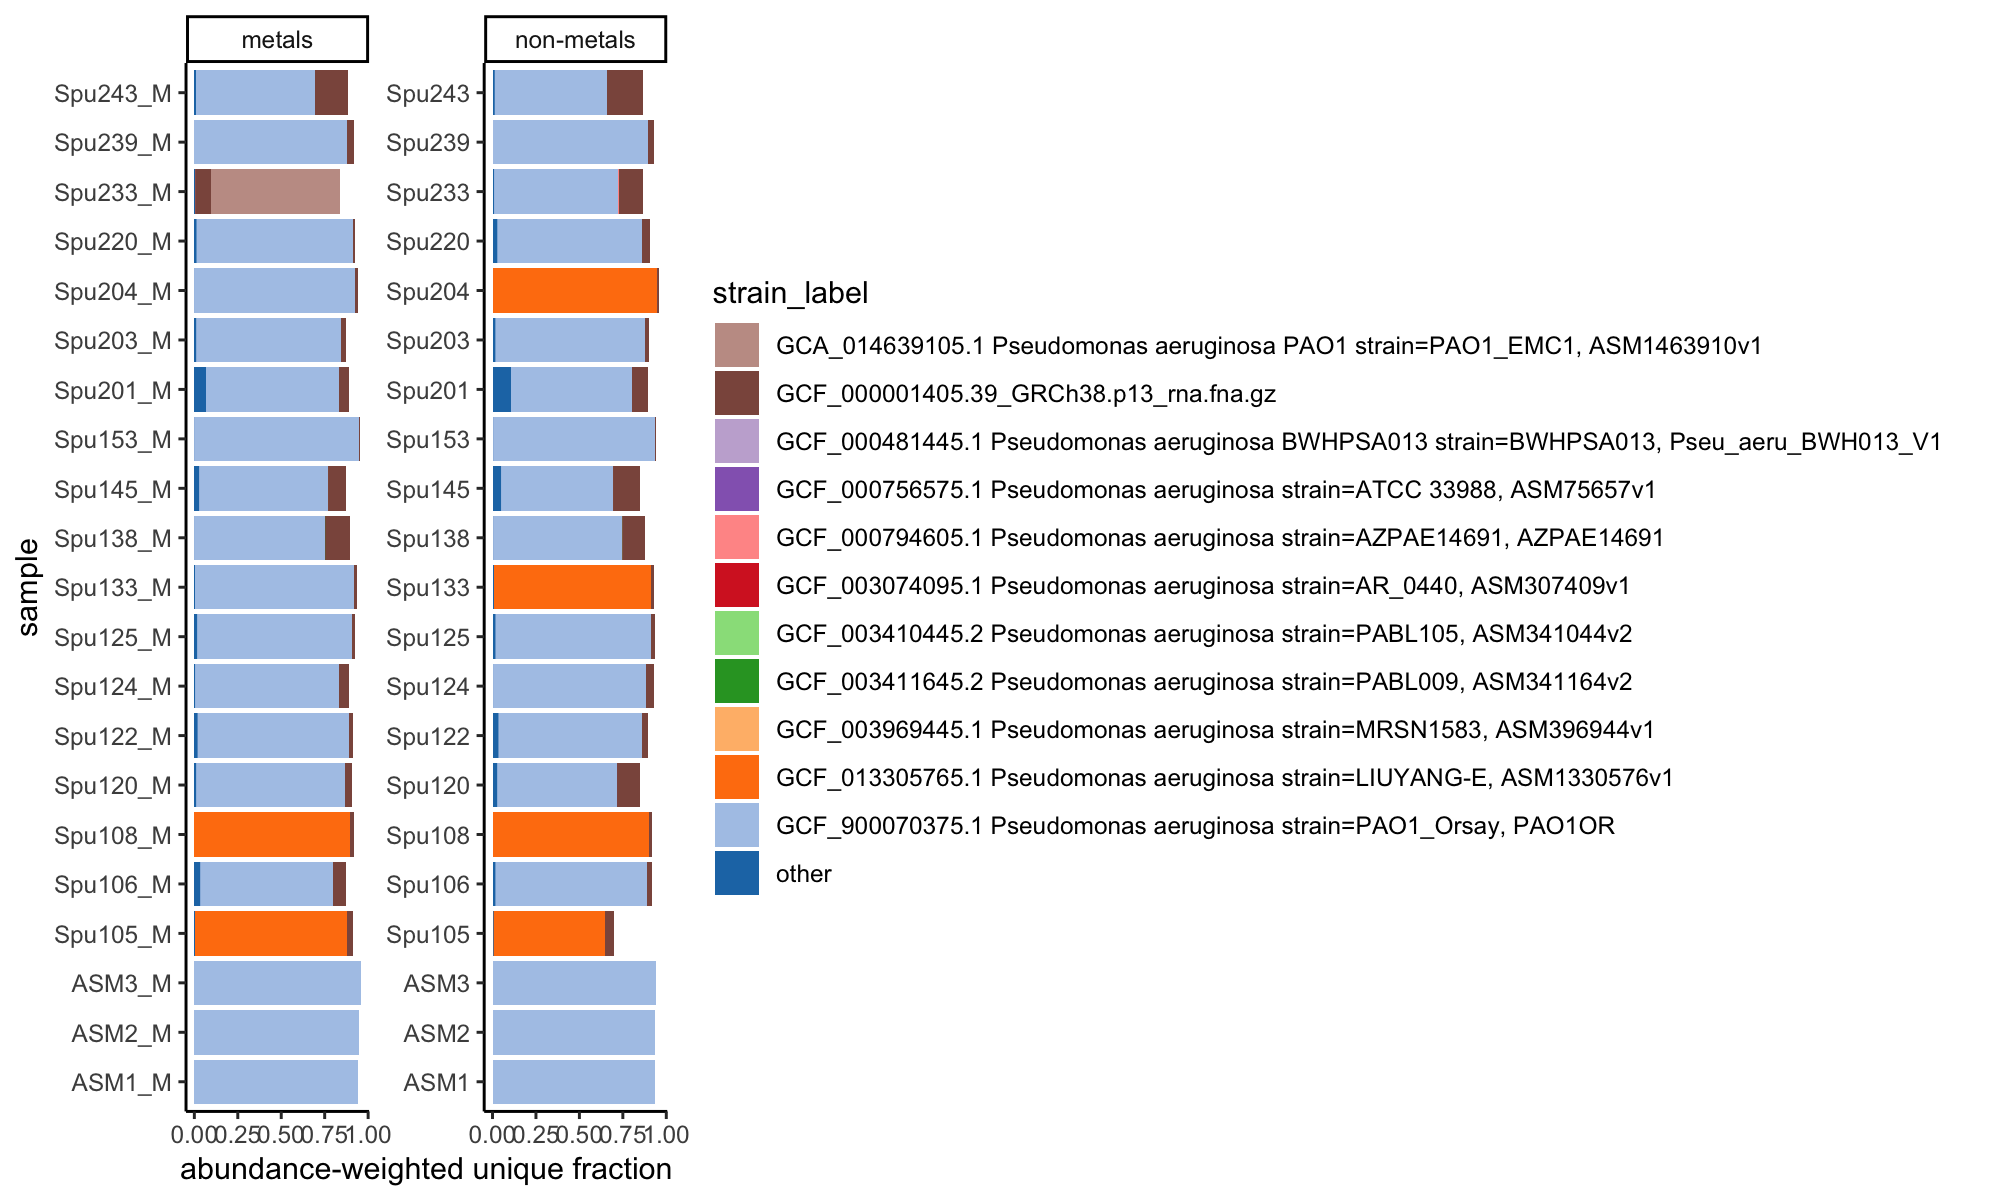

In [12]:
ggplot(gather_results_strain %>% filter(source == "hogan lab")%>% filter(!query_name %in% c("M633", "M632", "M631")), 
       aes(x = query_name, y = f_unique_weighted, fill = strain_label)) + 
  geom_col() +
  scale_fill_tableau(palette = "Classic 20", direction = -1) +
  theme_classic() +
  coord_flip() + facet_wrap(~exp, scales = "free_y") +
  labs(x = "sample", y = "abundance-weighted unique fraction")

Warning message in check_pal_n(n, max_n):
“This palette can handle a maximum of 20 values.You have supplied 35.”


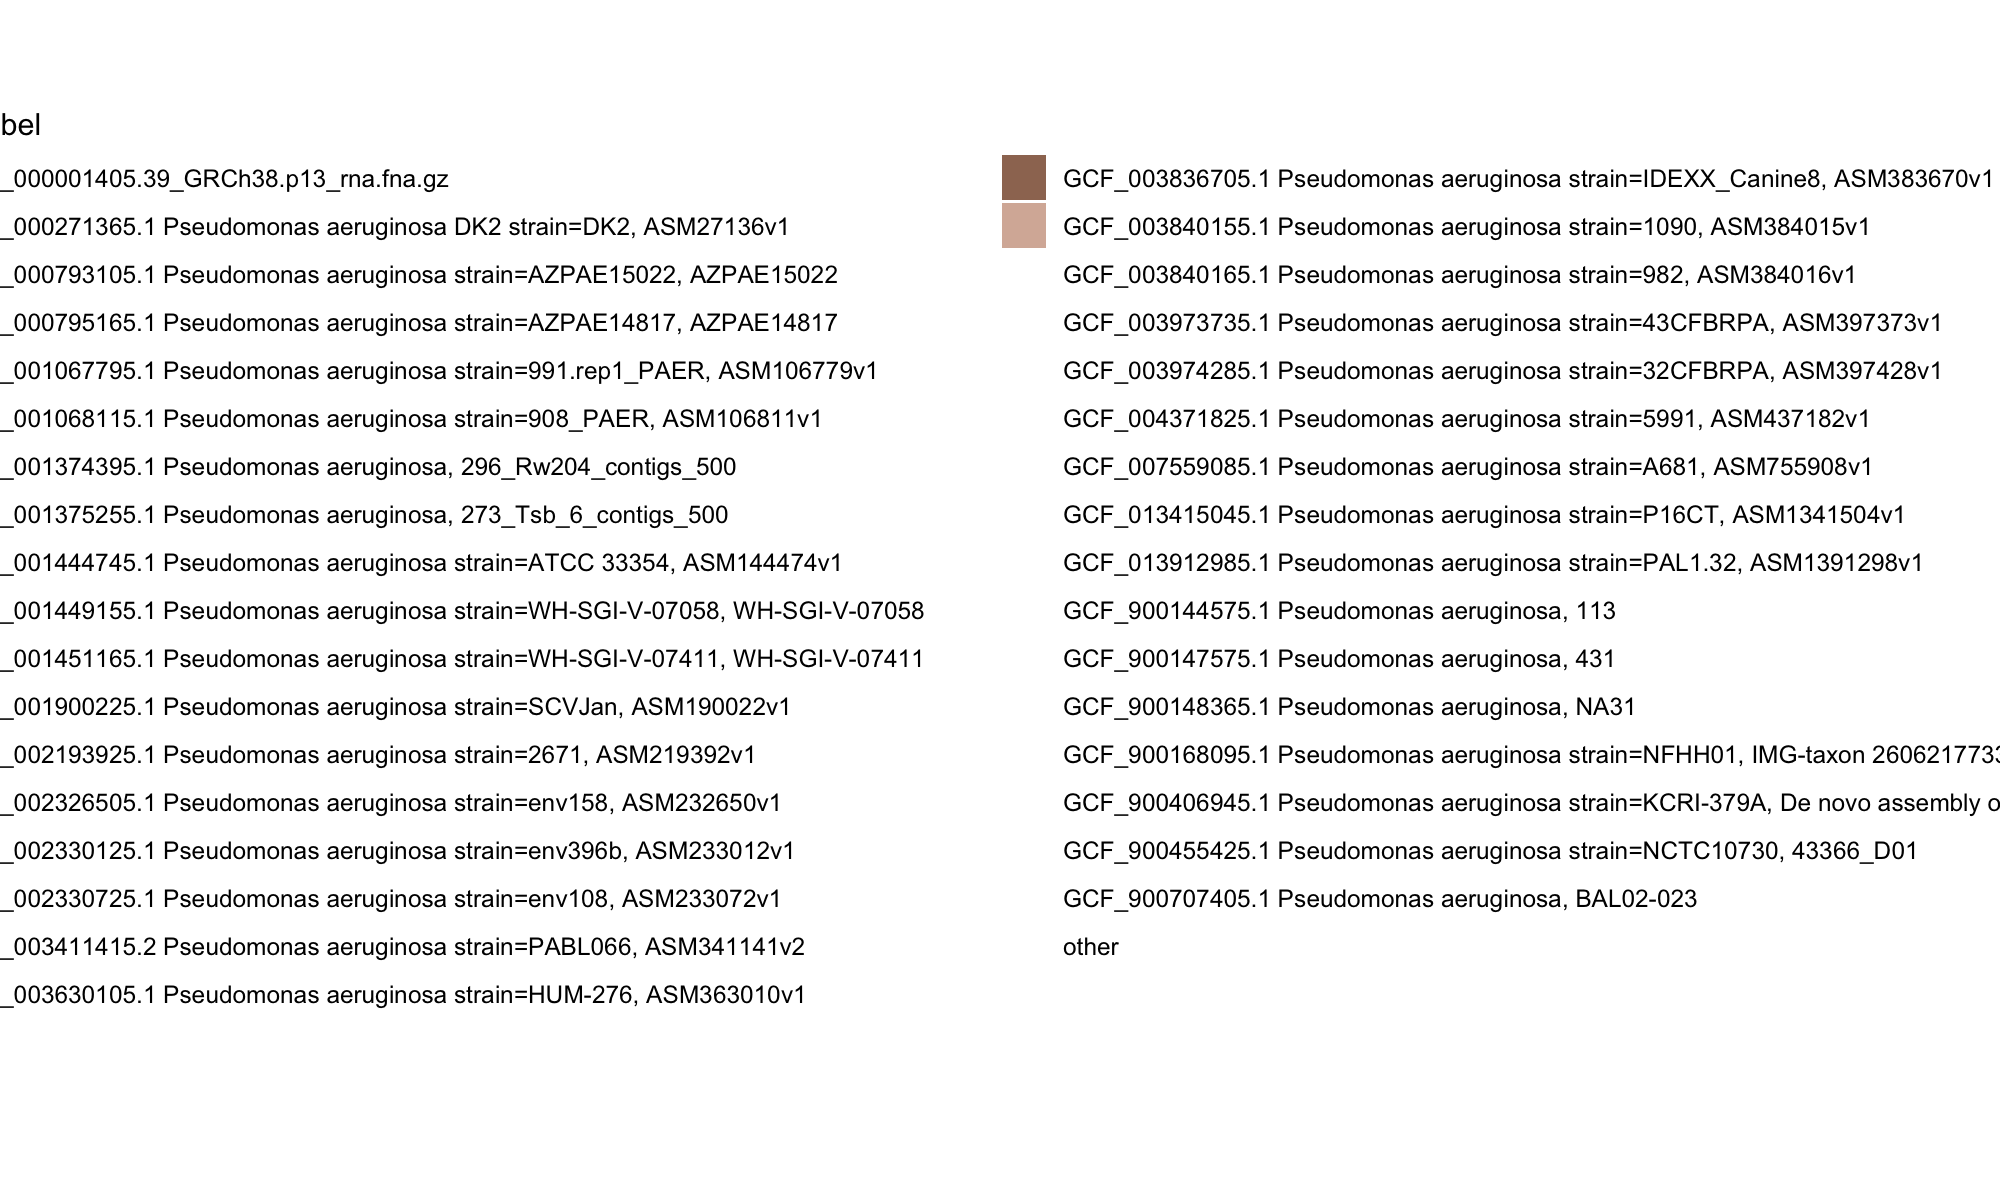

In [13]:
ggplot(gather_results_strain %>% filter(source == "public"), 
       aes(x = query_name, y = f_unique_weighted, fill = strain_label)) + 
  geom_col() +
  scale_fill_tableau(palette = "Tableau 20") +
  theme_classic() +
  coord_flip() 

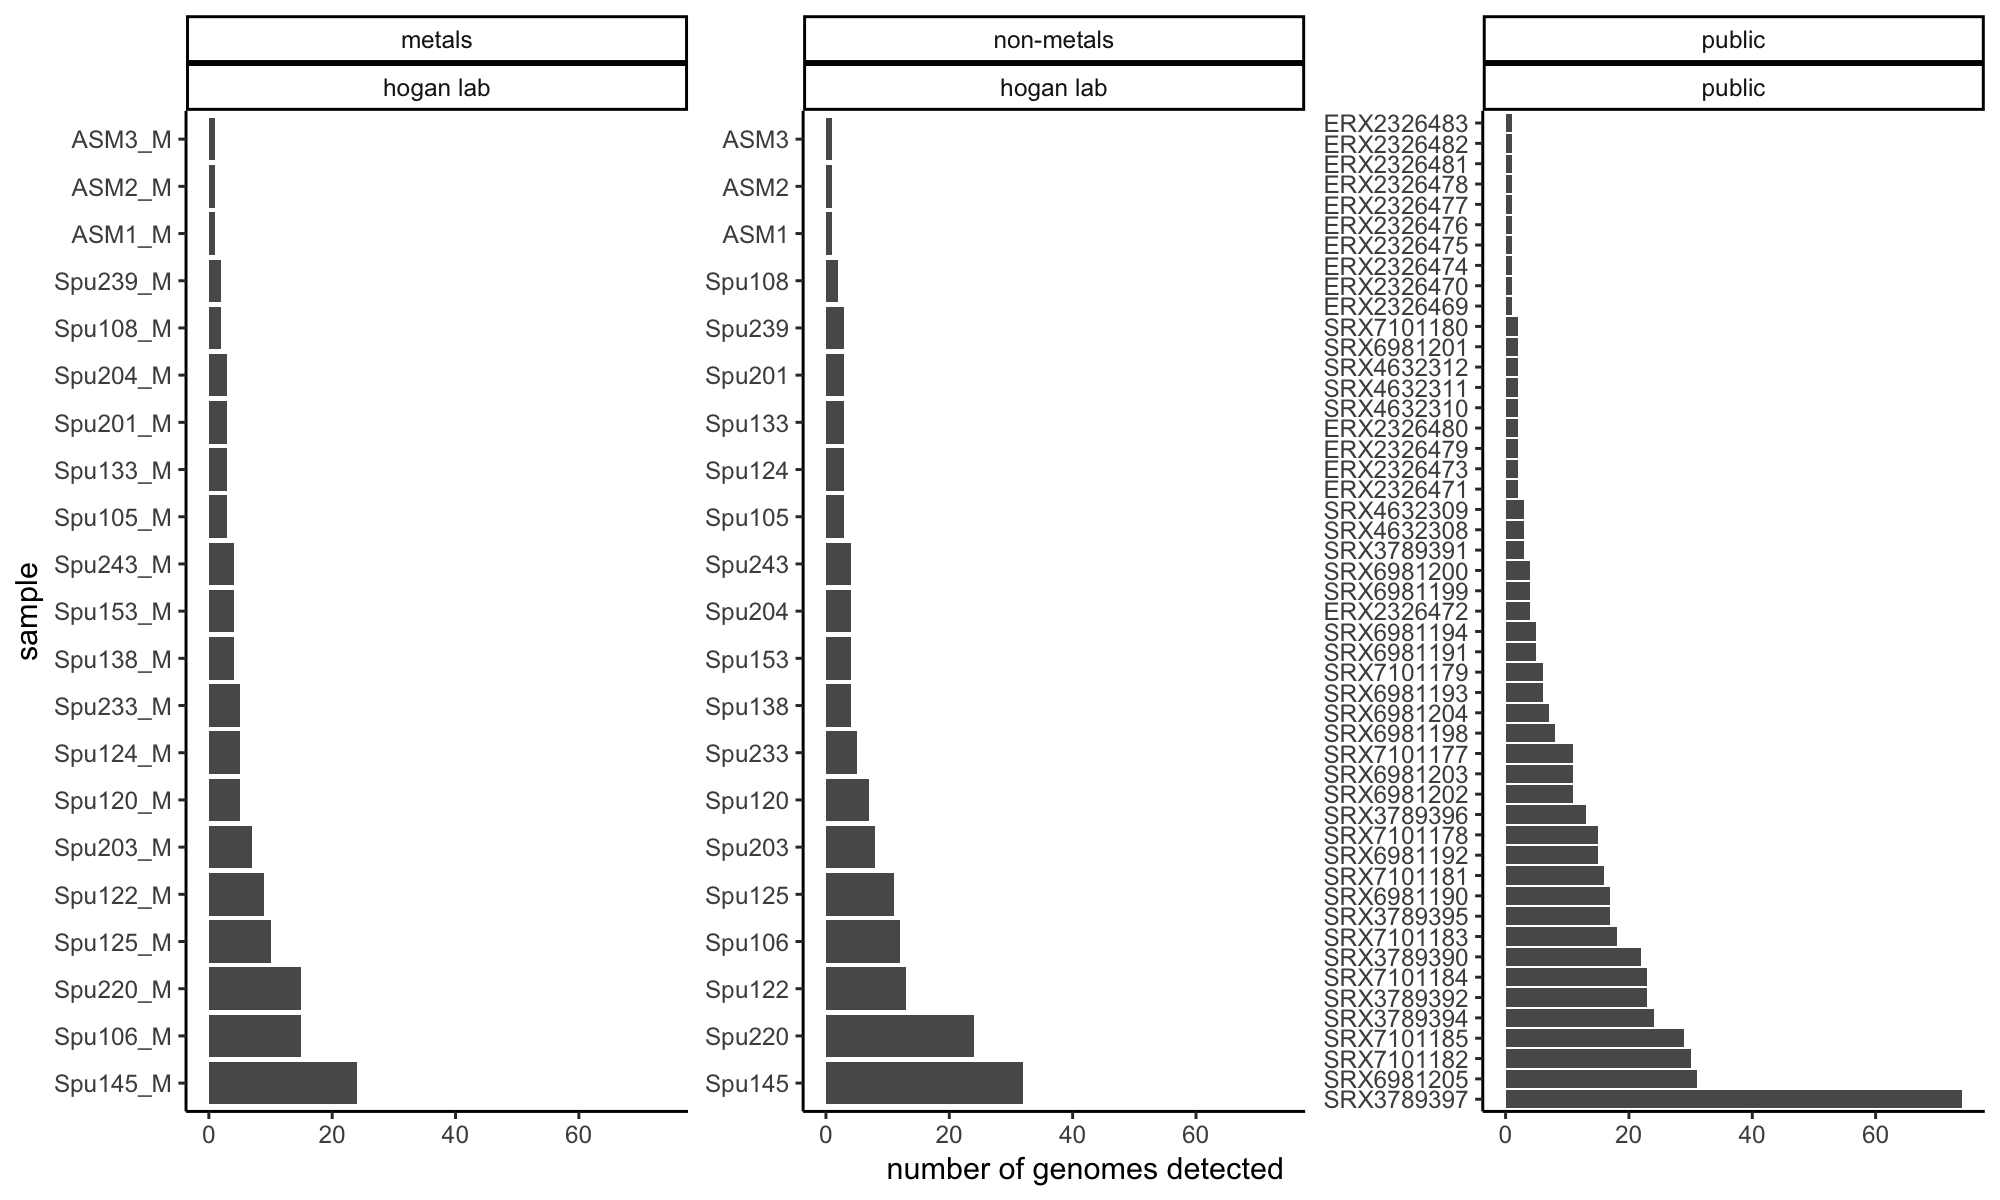

In [14]:
# number of strains per sample
num_gather_results <- gather_results %>%
  group_by(query_name, exp, source) %>%
  tally() %>%
  arrange(desc(n))

ggplot(num_gather_results %>% filter(!query_name %in% c("M633", "M632", "M631")), 
       aes(x = reorder(query_name, -n), y = n)) +
  geom_col() +
  theme_classic() +
  coord_flip() + 
  facet_wrap(~exp + source, scales = "free_y") +
  labs( y = "number of genomes detected", x = "sample")

In [15]:
num_gather_results

query_name,exp,source,n
<chr>,<chr>,<chr>,<int>
SRX3789397,public,public,74
Spu145,non-metals,hogan lab,32
SRX6981205,public,public,31
SRX7101182,public,public,30
SRX7101185,public,public,29
Spu145_M,metals,hogan lab,24
Spu220,non-metals,hogan lab,24
SRX3789394,public,public,24
SRX3789392,public,public,23


## Species plots

To reduce the complexity of the composition of the RNA-seq samples, we can summarize abundance profiles to the species level. There are still too many species to visualize all of them at once, but by focusing on medically relevant species, we can do a pretty good job of looking at the species-level composition of the samples.

To summarize abundance profiles to the species level, we use the taxonomic lineages of each genome in the GTDB database to sum the `f_unique_weighted` values for all genomes detected in a sample for that species.

In [16]:
# medically relevant species to CF
species_of_interest <- c(
    "s__Pseudomonas aeruginosa",
    "s__Staphylococcus aureus",
    "s__Burkholderia multivorans",
    "s__Burkholderia cepacia",
    "s__Mycobacterium avium",
    "s__Mycobacterium abscessus",
    "s__Haemophilus influenzae",
    "s__Stenotrophomonas maltophilia",
    "s__Burkholderia cenocepacia_B",    
    "s__Achromobacter xylosoxidans",
    "human")

In [17]:
gather_results %>%
  group_by(species) %>%
  tally() %>%
  arrange(desc(n))

species,n
<chr>,<int>
s__Pseudomonas aeruginosa,112
human,69
s__Prevotella melaninogenica,34
s__Streptococcus parasanguinis_B,26
s__Staphylococcus aureus,20
s__Porphyromonas pasteri,18
s__Veillonella parvula_A,17
s__Prevotella histicola,16
s__Rothia mucilaginosa_A,16


In [18]:
unique(sort(gather_results$species))

[1] "human"                              
  [2] "s__Achromobacter xylosoxidans"      
  [3] "s__Acinetobacter baumannii"         
  [4] "s__Actinomyces gerencseriae"        
  [5] "s__Actinomyces graevenitzii"        
  [6] "s__Actinomyces israelii"            
  [7] "s__Actinomyces oris"                
  [8] "s__Actinomyces oris_C"              
  [9] "s__Alloprevotella tannerae"         
 [10] "s__Alloscardovia omnicolens"        
 [11] "s__Anaeroglobus micronuciformis"    
 [12] "s__Bacillus intestinalis"           
 [13] "s__Bifidobacterium breve"           
 [14] "s__Bifidobacterium dentium"         
 [15] "s__Bulleidia moorei"                
 [16] "s__Burkholderia cenocepacia_B"      
 [17] "s__Burkholderia mallei"             
 [18] "s__Burkholderia multivorans"        
 [19] "s__Campylobacter_A concisus_R"      
 [20] "s__Campylobacter_A concisus_T"      
 [21] "s__Capnocytophaga endodontalis"     
 [22] "s__Capnocytophaga gingivalis"       
 [23] "s__Capnocytophaga granulosa"        
 [24] "s__Capnocytophaga leadbetteri"      
 [25] "s__Capnocytophaga ochracea"         
 [26] "s__Cutibacterium acnes"             
 [27] "s__Cutibacterium granulosum"        
 [28] "s__Dialister invisus"               
 [29] "s__Eikenella corrodens"             
 [30] "s__Eikenella halliae"               
 [31] "s__Escherichia coli_D"              
 [32] "s__Escherichia flexneri"            
 [33] "s__F0040 sp000318095"               
 [34] "s__F0058 sp000163695"               
 [35] "s__Finegoldia magna"                
 [36] "s__Finegoldia magna_F"              
 [37] "s__Finegoldia magna_H"              
 [38] "s__Friedmanniella luteola"          
 [39] "s__Fusobacterium nucleatum"         
 [40] "s__Fusobacterium periodonticum_D"   
 [41] "s__Fusobacterium vincentii"         
 [42] "s__Gemella haemolysans_B"           
 [43] "s__Gemella sanguinis"               
 [44] "s__Gemella sp900766305"             
 [45] "s__Granulicatella adiacens"         
 [46] "s__Granulicatella sp001058355"      
 [47] "s__Granulicatella sp900551535"      
 [48] "s__Haemophilus haemolyticus"        
 [49] "s__Haemophilus influenzae"          
 [50] "s__Haemophilus sp002998595"         
 [51] "s__Haemophilus_D parainfluenzae"    
 [52] "s__Haemophilus_D parainfluenzae_A"  
 [53] "s__Haemophilus_D parainfluenzae_K"  
 [54] "s__Haemophilus_D parainfluenzae_M"  
 [55] "s__Haemophilus_D sp001815355"       
 [56] "s__Haemophilus_D sp900756155"       
 [57] "s__Haemophilus_D sp900756875"       
 [58] "s__Helcococcus ovis"                
 [59] "s__JABCPE02 sp013333255"            
 [60] "s__Janibacter hoylei"               
 [61] "s__Kingella_A denitrificans"        
 [62] "s__Kingella_B oralis"               
 [63] "s__Lacticaseibacillus rhamnosus"    
 [64] "s__Lactobacillus gasseri"           
 [65] "s__Lactobacillus paragasseri"       
 [66] "s__Lancefieldella sp000564995"      
 [67] "s__Lautropia mirabilis"             
 [68] "s__Lawsonella clevelandensis_A"     
 [69] "s__Leptotrichia massiliensis"       
 [70] "s__Leptotrichia wadei"              
 [71] "s__Leptotrichia_A sp000469505"      
 [72] "s__Leptotrichia_A sp001274535"      
 [73] "s__Limosilactobacillus fermentum"   
 [74] "s__Limosilactobacillus reuteri"     
 [75] "s__Metamycoplasma salivarium"       
 [76] "s__Mogibacterium diversum"          
 [77] "s__Negativicoccus succinicivorans"  
 [78] "s__Neisseria mucosa"                
 [79] "s__Neisseria sp000186165"           
 [80] "s__Neisseria subflava_A"            
 [81] "s__Neisseria subflava_C"            
 [82] "s__Nocardiopsis alba"               
 [83] "s__Olegusella massiliensis"         
 [84] "s__Parvimonas micra"                
 [85] "s__Pauljensenia odontolytica_B"     
 [86] "s__Pauljensenia sp000278725"        
 [87] "s__Pauljensenia sp000308055"        
 [88] "s__Pauljensenia sp000411415"        
 [89] "s__Pauljensenia sp000466265"        
 [90] "s__Pauljensenia sp000758755"        
 [91] "s__Pauljensenia sp001838165"       

In [19]:
gather_results_species <- gather_results %>%
  mutate(species_label = ifelse(species %in% species_of_interest, species, "other"))

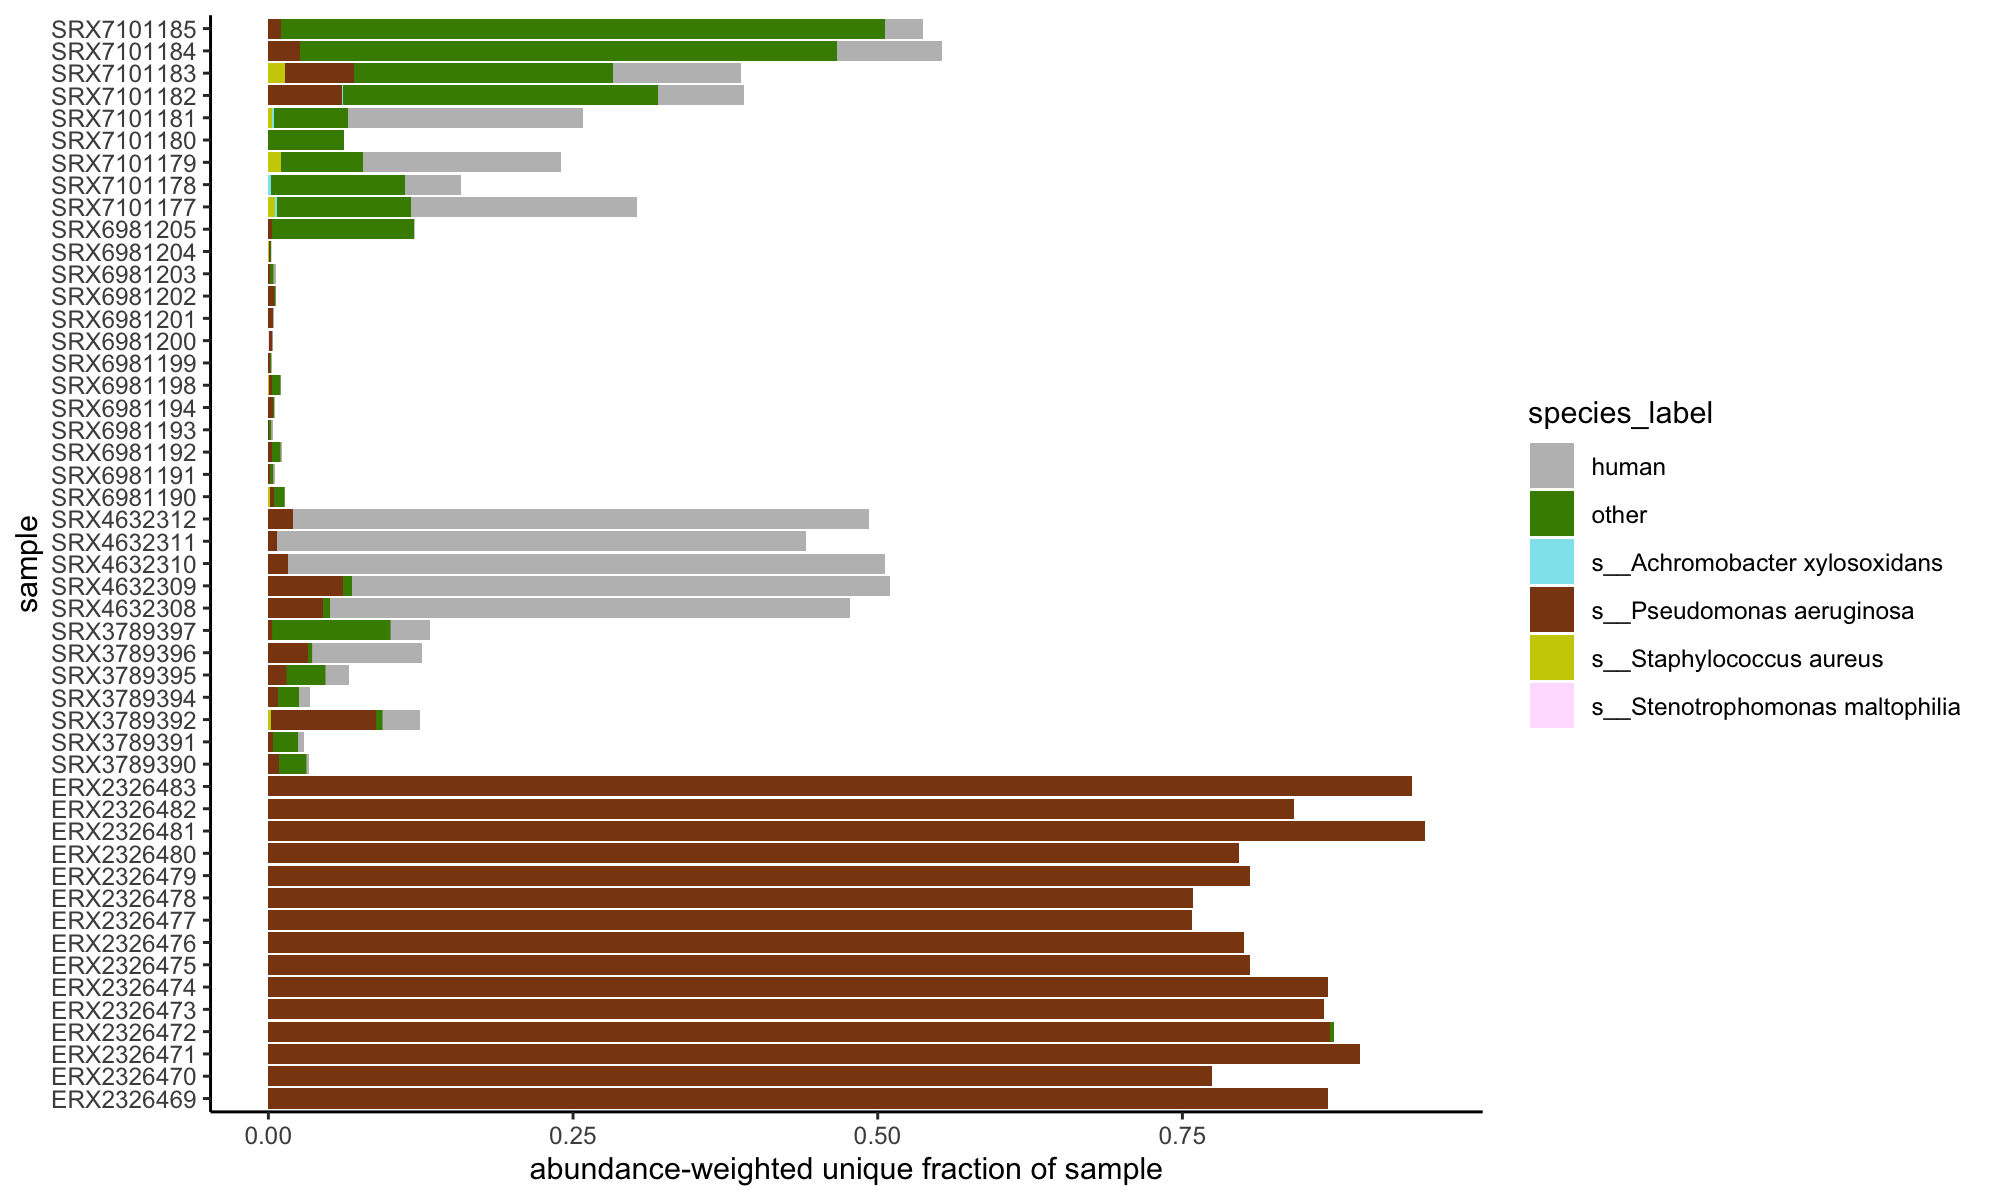

In [20]:
ggplot(gather_results_species %>% filter(source == "public"), 
       aes(x = query_name, y = f_unique_weighted, fill = species_label)) + 
  geom_col() +
  scale_fill_manual(values = c("grey", "chartreuse4", "cadetblue2",  "chocolate4", "yellow3", "thistle1")) +
  theme_classic() +
  coord_flip() +
  labs(x = "sample", y = "abundance-weighted unique fraction of sample")

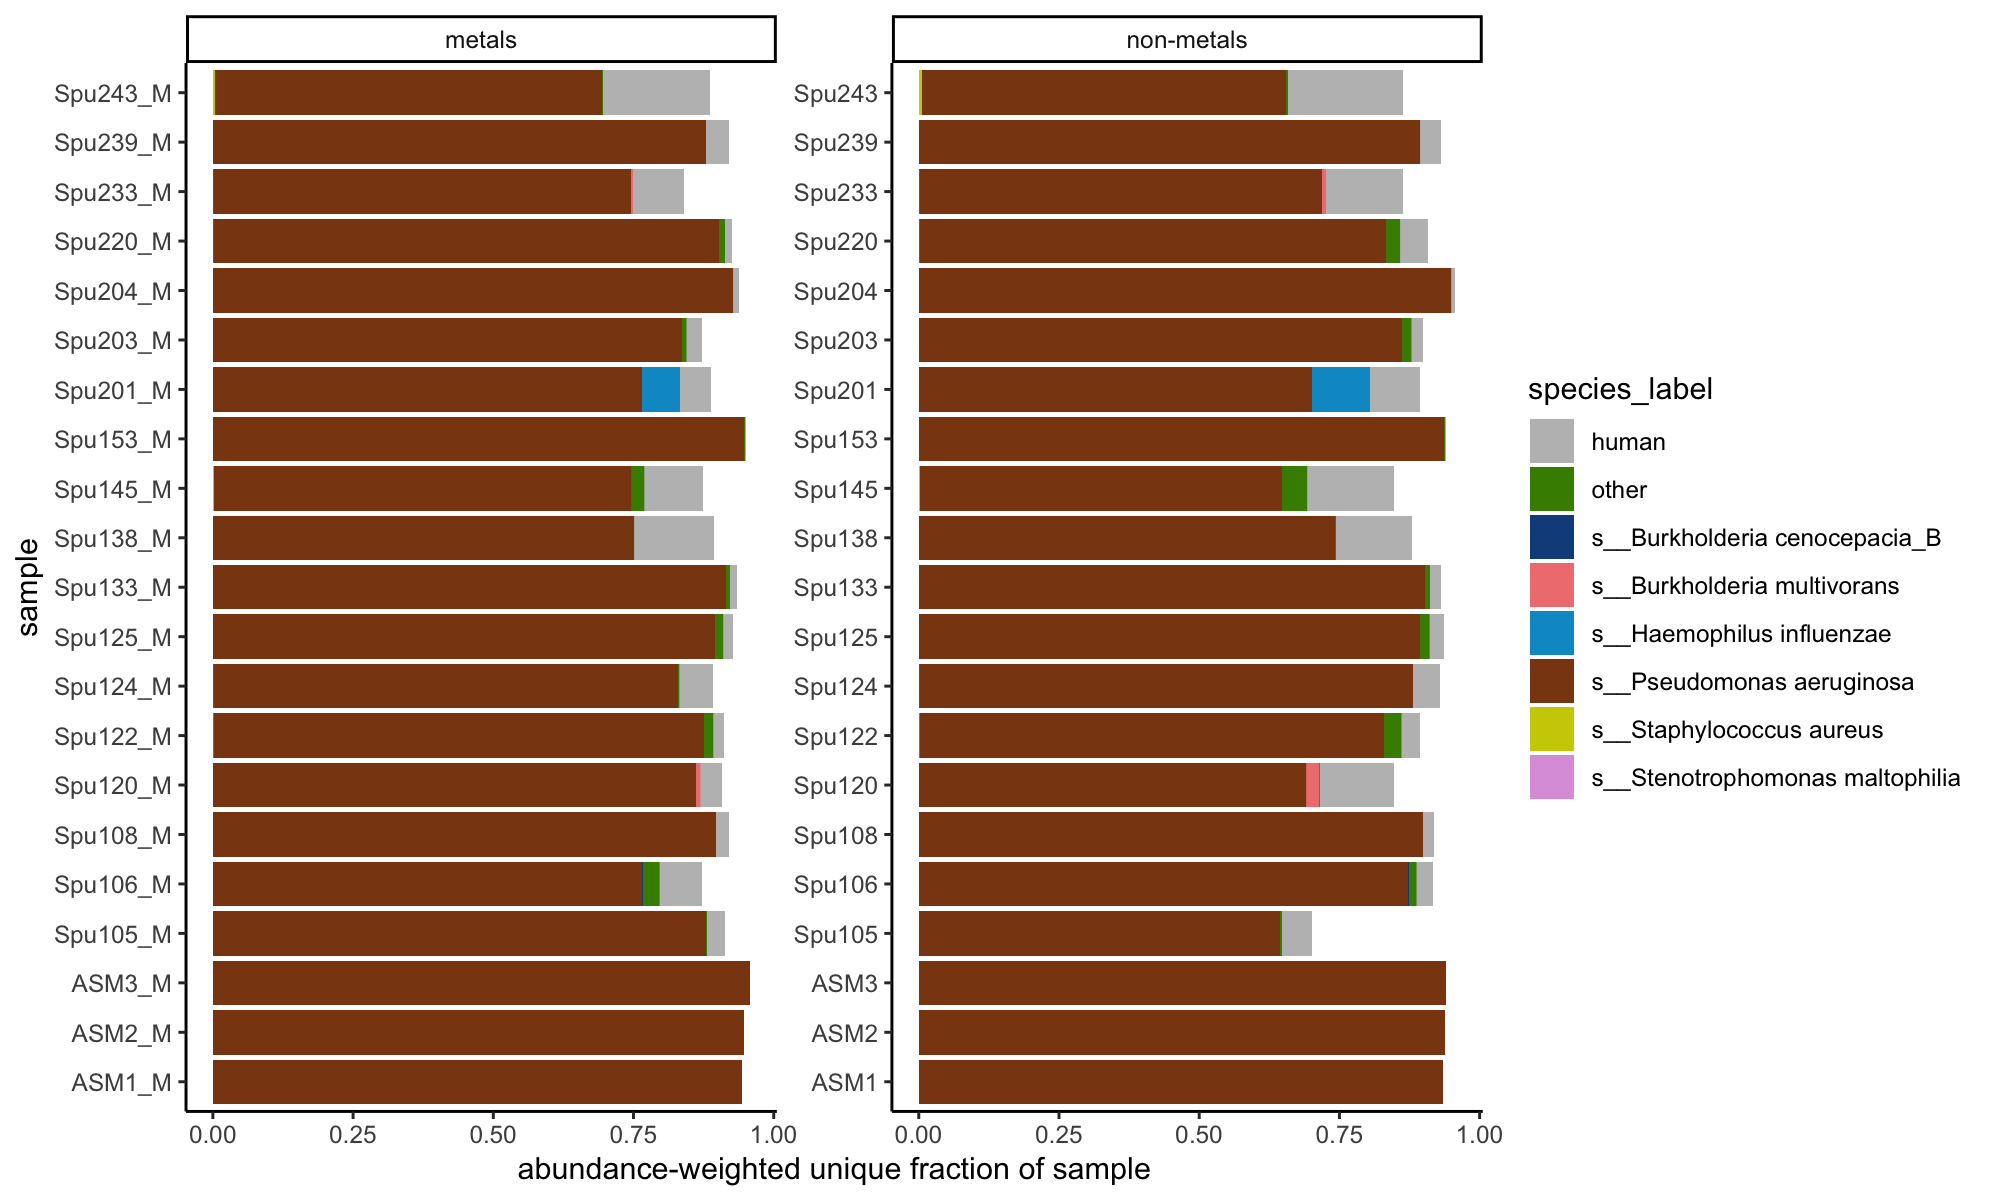

In [21]:
ggplot(gather_results_species %>% filter(source == "hogan lab") %>% filter(!query_name %in% c("M633", "M632", "M631")),
       aes(x = query_name, y = f_unique_weighted, fill = species_label)) + 
  geom_col() +
  scale_fill_manual(values = c("grey", "chartreuse4", "dodgerblue4", "lightcoral", "deepskyblue3", "chocolate4", "yellow3", "plum")) +
  theme_classic() +
  coord_flip() +
  facet_wrap(~exp, scales = "free_y") +
  labs(x = "sample", y = "abundance-weighted unique fraction of sample")

## Ordination plots based on taxonomy profiles

Format the gather results into tables used to build a phyloseq object. Phyloseq is a library for manipulating count data with associated taxonomic information and metadata in R.

In [48]:
library(phyloseq)
library(microbiome)

### Function to make plotting many ordination plots easier

In [86]:
# define a functions to use batch apply ordination methods
llply_ord <- function(method, physeq, dist){
  ordi <- ordinate(physeq, method=method, distance=dist)
  plot_ordination(physeq, ordi, "samples")
}

format_plist <- function(x){
    df <- x$data[, 1:2]
    colnames(df) <- c("Axis1", "Axis2")
    return(cbind(df, x$data))
}

apply_ord <- function(physeq){
    # define distance
    dist <- "bray" 
    
    # define list of ordination methods to use
    ord_methods <- c("DCA", "CCA", "RDA", "NMDS", "MDS", "PCoA") 

    # apply ordination methods 
    plist <- plyr::llply(as.list(ord_methods), llply_ord, physeq, dist)

    # name the list by ordination method
    names(plist) <- ord_methods

    # transform list into dataframe
    pdataframe <- plyr::ldply(plist, format_plist)

    # name first col of dataframe method
    names(pdataframe)[1] <- "method"
    return(pdataframe)
}

### Format gather results

In [100]:
# use accession as row name (like ASV name)
# use unique_intersect_bp / scaled (2000) for counts
# use query_name for sample name
gather_as_counts <- gather_results_species %>%
  filter(species != "human") %>%
  mutate(hash_count = unique_intersect_bp/2000) %>%
  select(accession, hash_count, query_name) %>%
  pivot_wider(id_cols = accession, names_from = query_name, values_from = hash_count) %>%
  mutate(across(where(~ anyNA(.) & is.numeric(.)), ~ replace_na(., 0))) %>%
  column_to_rownames("accession") 

In [101]:
gather_taxonomy <- gather_results_species %>%
  filter(species != "human") %>%
  select(accession, superkingdom, phylum, class, order, family, genus, species) %>% 
  distinct() %>%
  column_to_rownames("accession")

In [102]:
gather_info <- num_gather_results %>%
  column_to_rownames("query_name")

In [103]:
gather_physeq <- phyloseq(otu_table(gather_as_counts, taxa_are_rows = T),
                          tax_table(as.matrix(gather_taxonomy)),
                          sample_data(gather_info))

In [104]:
strain_ord <- apply_ord(gather_physeq)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.004967237 
Run 1 stress 0.001291369 
... New best solution
... Procrustes: rmse 0.08145288  max resid 0.4312048 
Run 2 stress 0.001121341 
... New best solution
... Procrustes: rmse 0.08177252  max resid 0.4240457 
Run 3 stress 0.001012478 
... New best solution
... Procrustes: rmse 0.06631518  max resid 0.4612447 
Run 4 stress 0.0007943851 
... New best solution
... Procrustes: rmse 0.08097269  max resid 0.4470063 
Run 5 stress 0.001288355 
... Procrustes: rmse 0.08829747  max resid 0.4928354 
Run 6 stress 0.0008458554 
... Procrustes: rmse 0.09397349  max resid 0.5852516 
Run 7 stress 0.0008641315 
... Procrustes: rmse 0.09359635  max resid 0.5330175 
Run 8 stress 0.0007407085 
... New best solution
... Procrustes: rmse 0.09920659  max resid 0.5352786 
Run 9 stress 0.0004996189 
... New best solution
... Procrustes: rmse 0.08852742  max resid 0.5908993 
Run 10 stress 0.0007466782 
... Procrustes: rmse 0.078845

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”


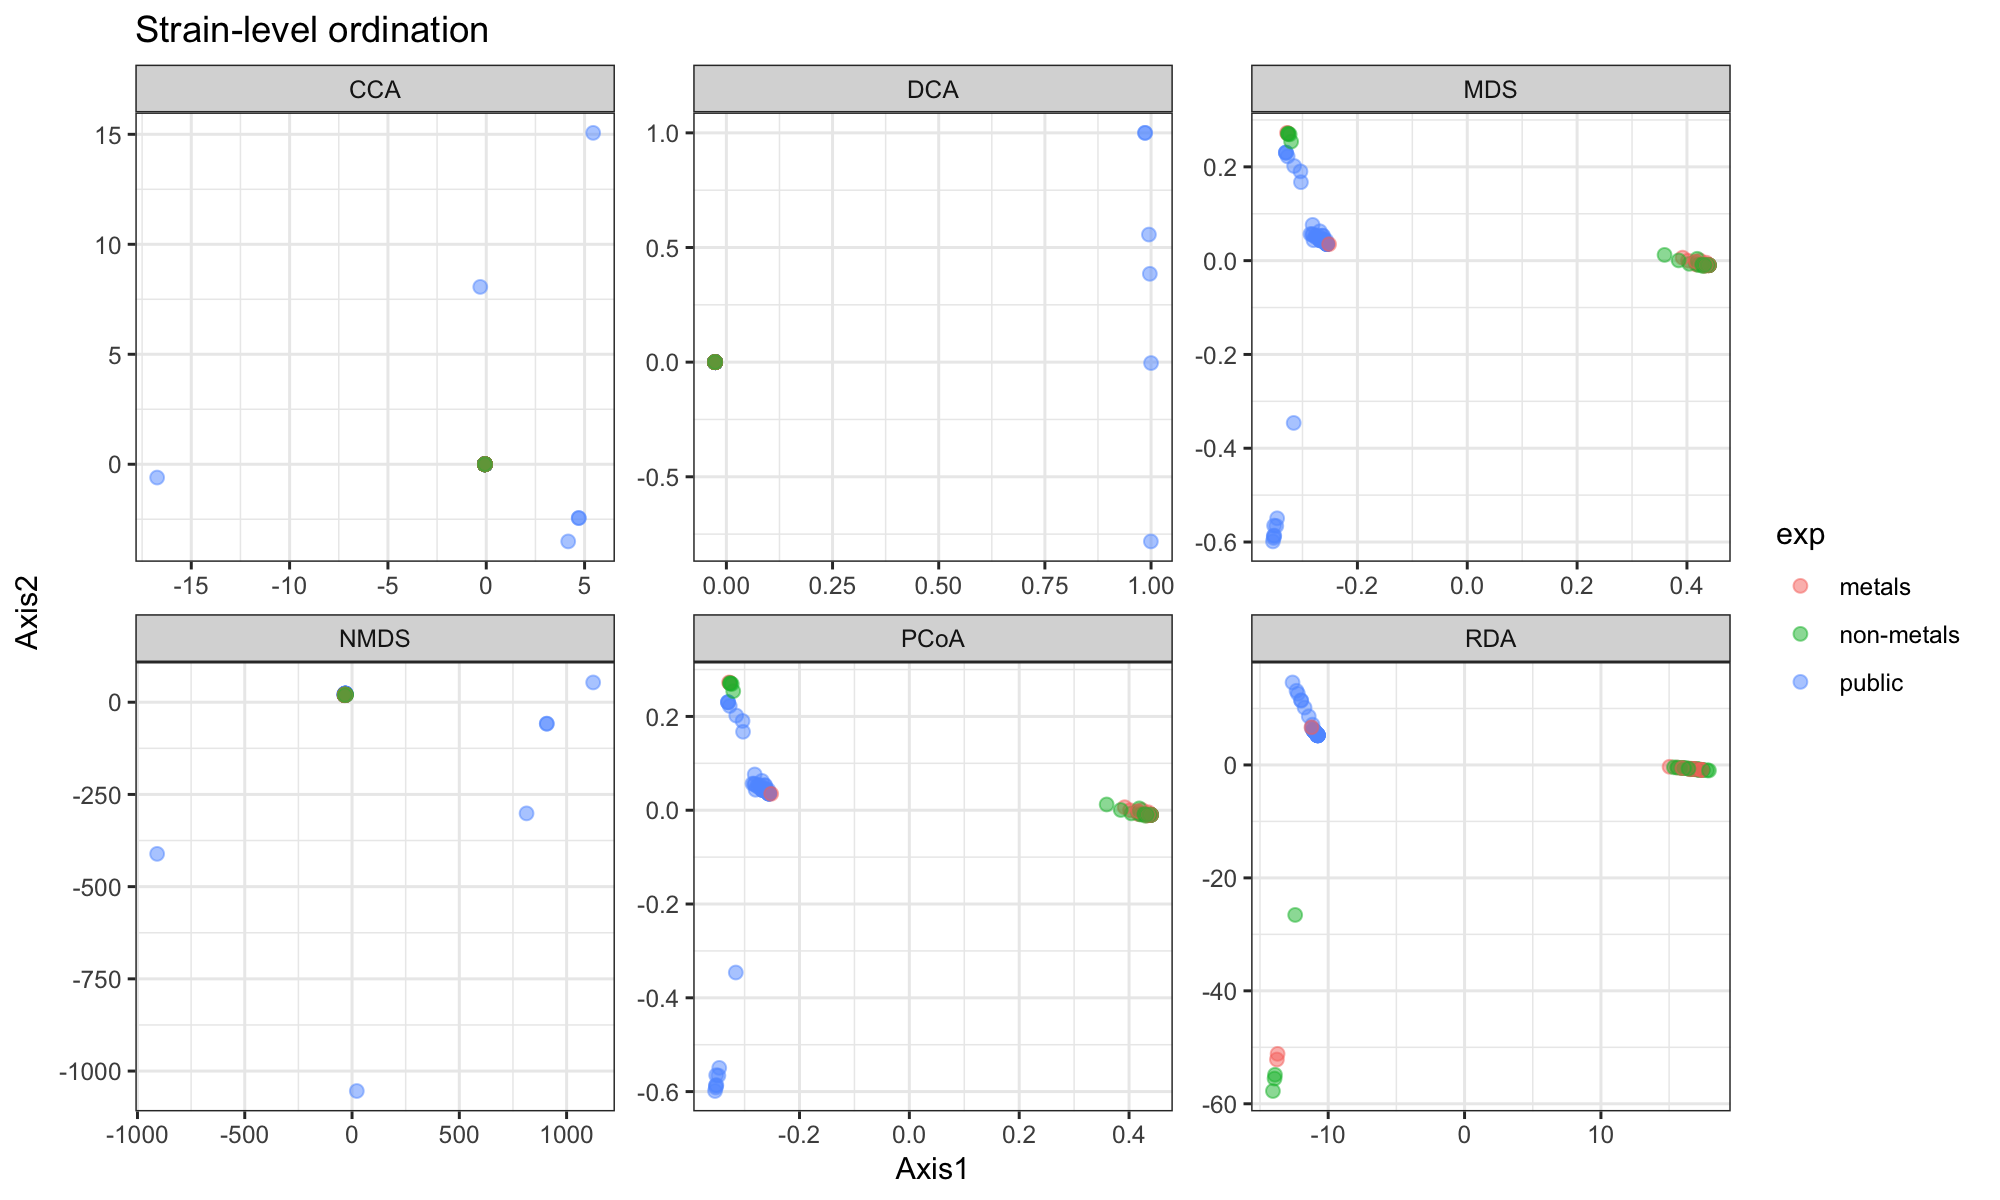

In [105]:
ggplot(strain_ord, aes(Axis1, Axis2, color= exp)) +
  geom_point(size=2, alpha = .5) +
  facet_wrap(~method, scales="free") +
  theme_bw() +
  labs(title = "Strain-level ordination")

In [106]:
# aggregate to different levels of taxonomy and try plotting again
gather_physeq_species <- aggregate_taxa(gather_physeq, level = "species")
gather_physeq_genus <- aggregate_taxa(gather_physeq, level = "genus")
gather_physeq_class <- aggregate_taxa(gather_physeq, level = "class")

In [107]:
species_ord <- apply_ord(gather_physeq_species)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1476913 
Run 1 stress 0.1493566 
Run 2 stress 0.1386798 
... New best solution
... Procrustes: rmse 0.05093099  max resid 0.2141182 
Run 3 stress 0.1484295 
Run 4 stress 0.1472346 
Run 5 stress 0.1460683 
Run 6 stress 0.1438861 
Run 7 stress 0.1476005 
Run 8 stress 0.1390369 
... Procrustes: rmse 0.01712298  max resid 0.1180196 
Run 9 stress 0.151177 
Run 10 stress 0.1348711 
... New best solution
... Procrustes: rmse 0.02980597  max resid 0.2067376 
Run 11 stress 0.1383214 
Run 12 stress 0.1360885 
Run 13 stress 0.143112 
Run 14 stress 0.1474071 
Run 15 stress 0.1372981 
Run 16 stress 0.1420329 
Run 17 stress 0.155283 
Run 18 stress 0.139652 
Run 19 stress 0.1350484 
... Procrustes: rmse 0.01764375  max resid 0.1190977 
Run 20 stress 0.1347981 
... New best solution
... Procrustes: rmse 0.01741536  max resid 0.1218632 
*** No convergence -- monoMDS stopping criteria:
     3: no. of iterations >= maxit
    17: s

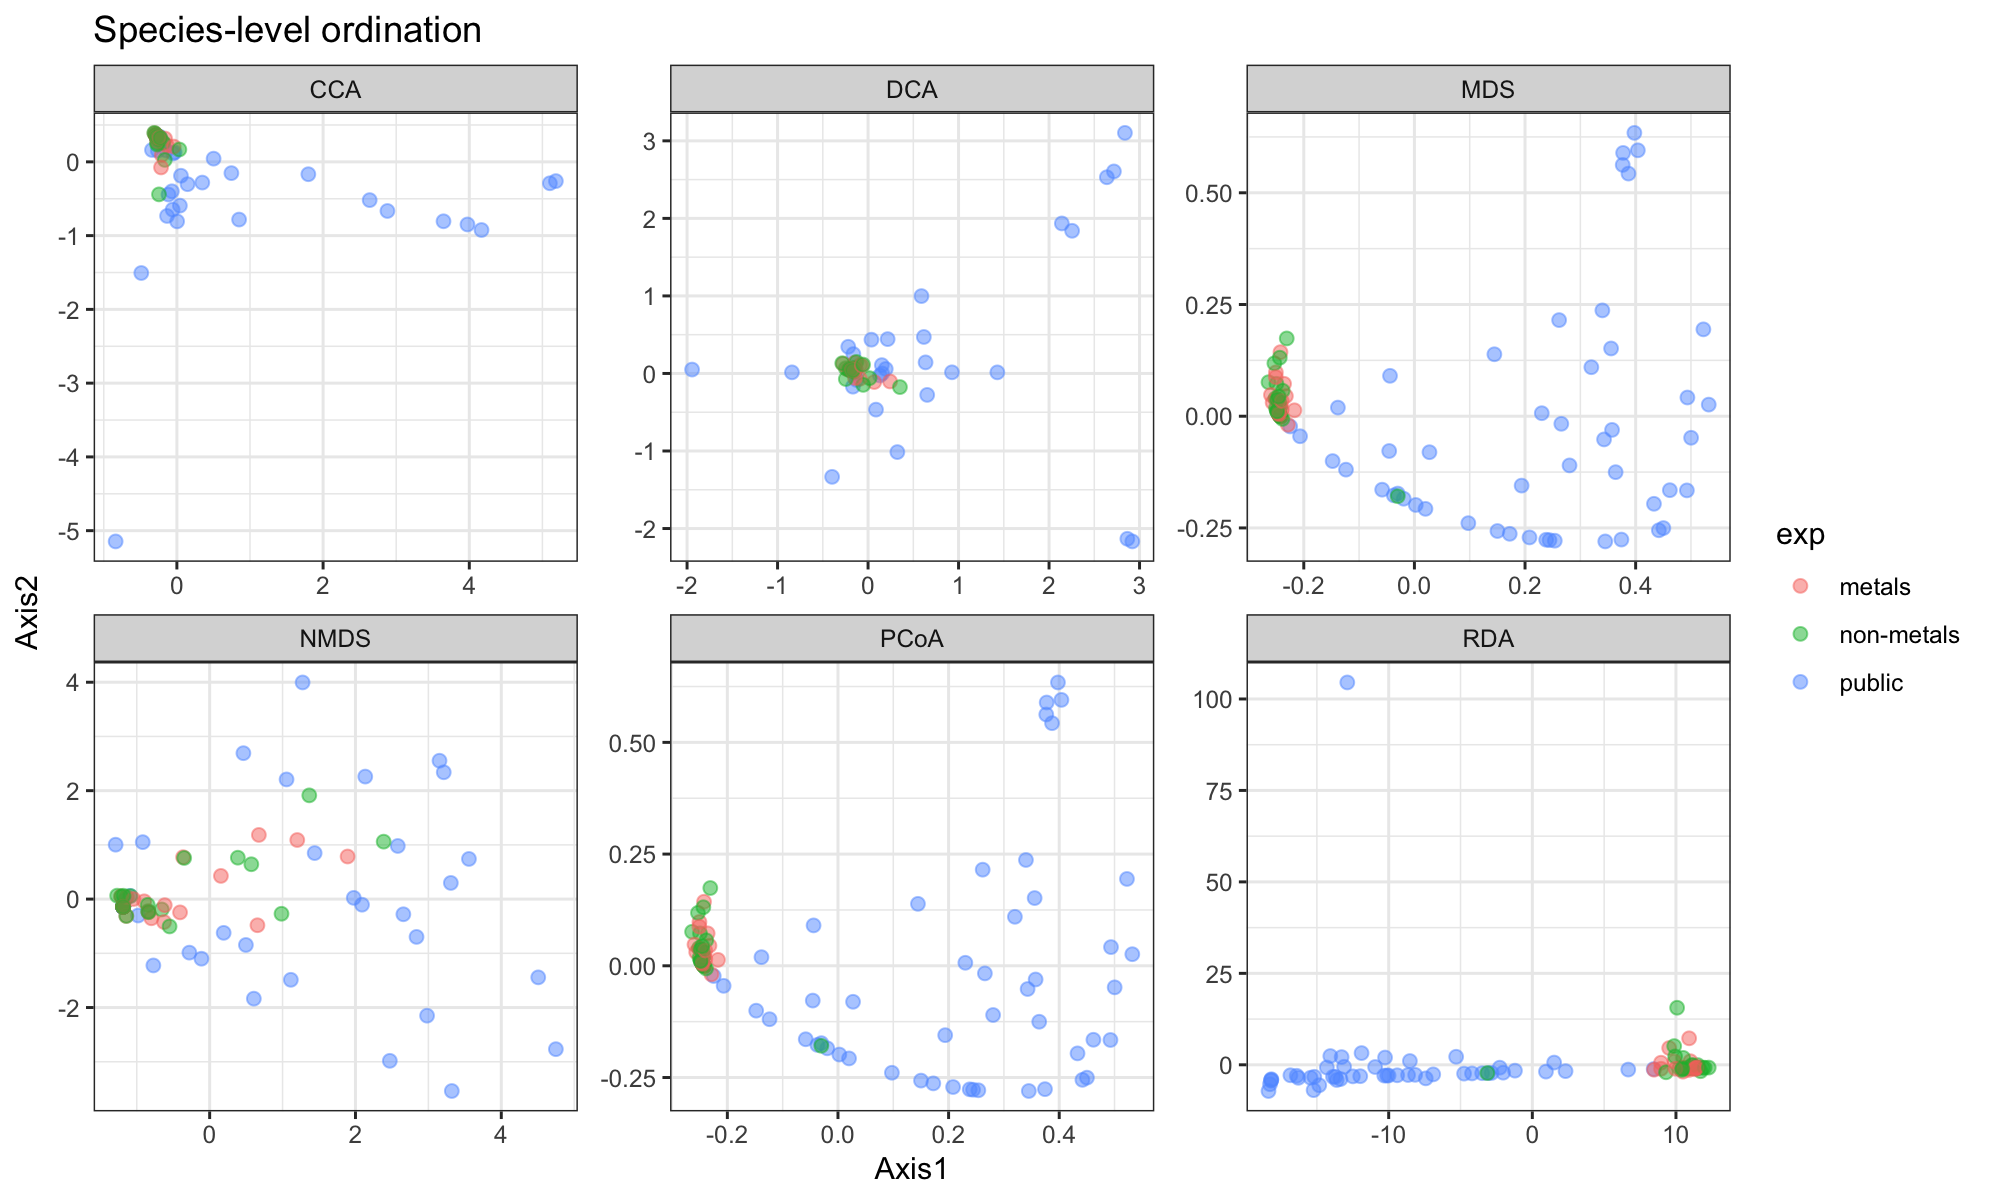

In [108]:
ggplot(species_ord, aes(Axis1, Axis2, color= exp)) +
  geom_point(size=2, alpha = .5) +
  facet_wrap(~method, scales="free") +
  theme_bw() +
  labs(title = "Species-level ordination")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.08072836 
Run 1 stress 0.08056574 
... New best solution
... Procrustes: rmse 0.003189916  max resid 0.02522317 
Run 2 stress 0.09064103 
Run 3 stress 0.09714958 
Run 4 stress 0.08086177 
... Procrustes: rmse 0.004254344  max resid 0.02609972 
Run 5 stress 0.09699621 
Run 6 stress 0.09706622 
Run 7 stress 0.09080606 
Run 8 stress 0.08072827 
... Procrustes: rmse 0.003166649  max resid 0.02525137 
Run 9 stress 0.08072828 
... Procrustes: rmse 0.003165792  max resid 0.02525317 
Run 10 stress 0.09083555 
Run 11 stress 0.1272042 
Run 12 stress 0.08056585 
... Procrustes: rmse 2.68842e-05  max resid 0.0002445002 
... Similar to previous best
Run 13 stress 0.09697258 
Run 14 stress 0.1222979 
Run 15 stress 0.08072844 
... Procrustes: rmse 0.003159945  max resid 0.02526523 
Run 16 stress 0.09064109 
Run 17 stress 0.09066021 
Run 18 stress 0.09703212 
Run 19 stress 0.1186768 
Run 20 stress 0.09679245 
*** Solution reach

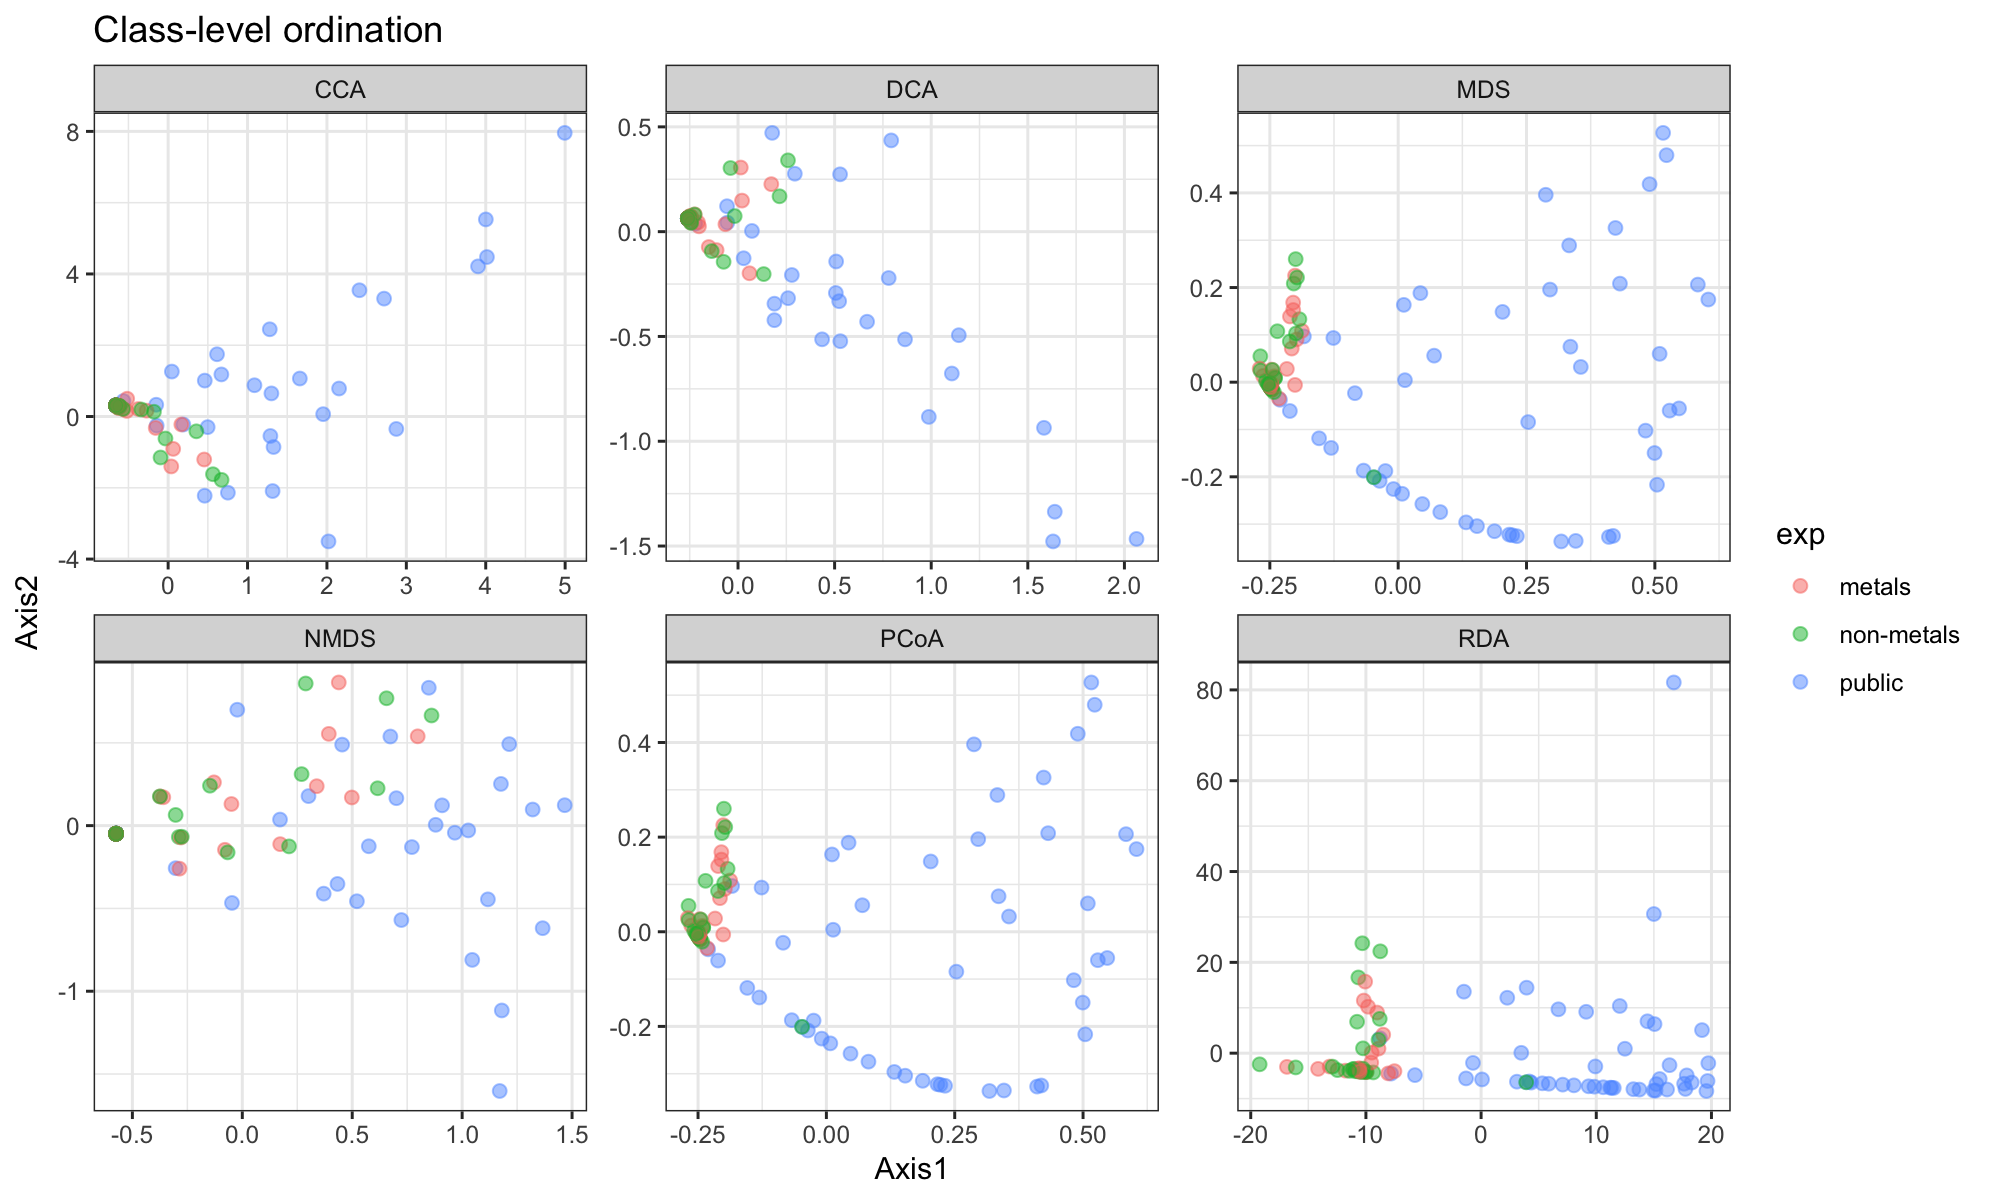

In [109]:
class_ord <- apply_ord(gather_physeq_class)
ggplot(class_ord, aes(Axis1, Axis2, color= exp)) +
  geom_point(size=2, alpha = .5) +
  facet_wrap(~method, scales="free") +
  theme_bw() +
  labs(title = "Class-level ordination")

Unsurprisingly, *Pseuodmonas aeruginosa* drives these trends, especially at the strain level. Try removing pseudomonas and see how that changes clustering.

In [115]:
gather_as_counts_no_pa <- gather_results_species %>%
  filter(species != "s__Pseudomonas aeruginosa") %>%
  filter(species != "human") %>%
  mutate(hash_count = unique_intersect_bp/2000) %>%
  select(accession, hash_count, query_name) %>%
  pivot_wider(id_cols = accession, names_from = query_name, values_from = hash_count) %>%
  mutate(across(where(~ anyNA(.) & is.numeric(.)), ~ replace_na(., 0))) %>%
  column_to_rownames("accession") 

gather_taxonomy_no_pa <- gather_results_species %>%
  filter(species != "s__Pseudomonas aeruginosa") %>%
  filter(species != "human") %>%
  select(accession, superkingdom, phylum, class, order, family, genus, species) %>% 
  distinct() %>%
  column_to_rownames("accession")

gather_physeq_no_pa <- phyloseq(otu_table(gather_as_counts_no_pa, taxa_are_rows = T),
                                tax_table(as.matrix(gather_taxonomy_no_pa)),
                                sample_data(gather_info))

Square root transformation
Wisconsin double standardization
Run 0 stress 9.726306e-05 
Run 1 stress 9.210633e-05 
... New best solution
... Procrustes: rmse 0.1199728  max resid 0.3781179 
Run 2 stress 9.707273e-05 
... Procrustes: rmse 0.1195486  max resid 0.3840381 
Run 3 stress 9.448399e-05 
... Procrustes: rmse 0.10817  max resid 0.3796319 
Run 4 stress 9.955847e-05 
... Procrustes: rmse 0.1061377  max resid 0.3463724 
Run 5 stress 9.763001e-05 
... Procrustes: rmse 0.1222775  max resid 0.3436426 
Run 6 stress 9.994458e-05 
... Procrustes: rmse 0.1156067  max resid 0.3566691 
Run 7 stress 9.666022e-05 
... Procrustes: rmse 0.1169963  max resid 0.354638 
Run 8 stress 9.749558e-05 
... Procrustes: rmse 0.124277  max resid 0.3113998 
Run 9 stress 9.208669e-05 
... New best solution
... Procrustes: rmse 0.1055243  max resid 0.2635124 
Run 10 stress 9.672366e-05 
... Procrustes: rmse 0.1222339  max resid 0.3611617 
Run 11 stress 9.427593e-05 
... Procrustes: rmse 0.1212006  max resid 0.

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”


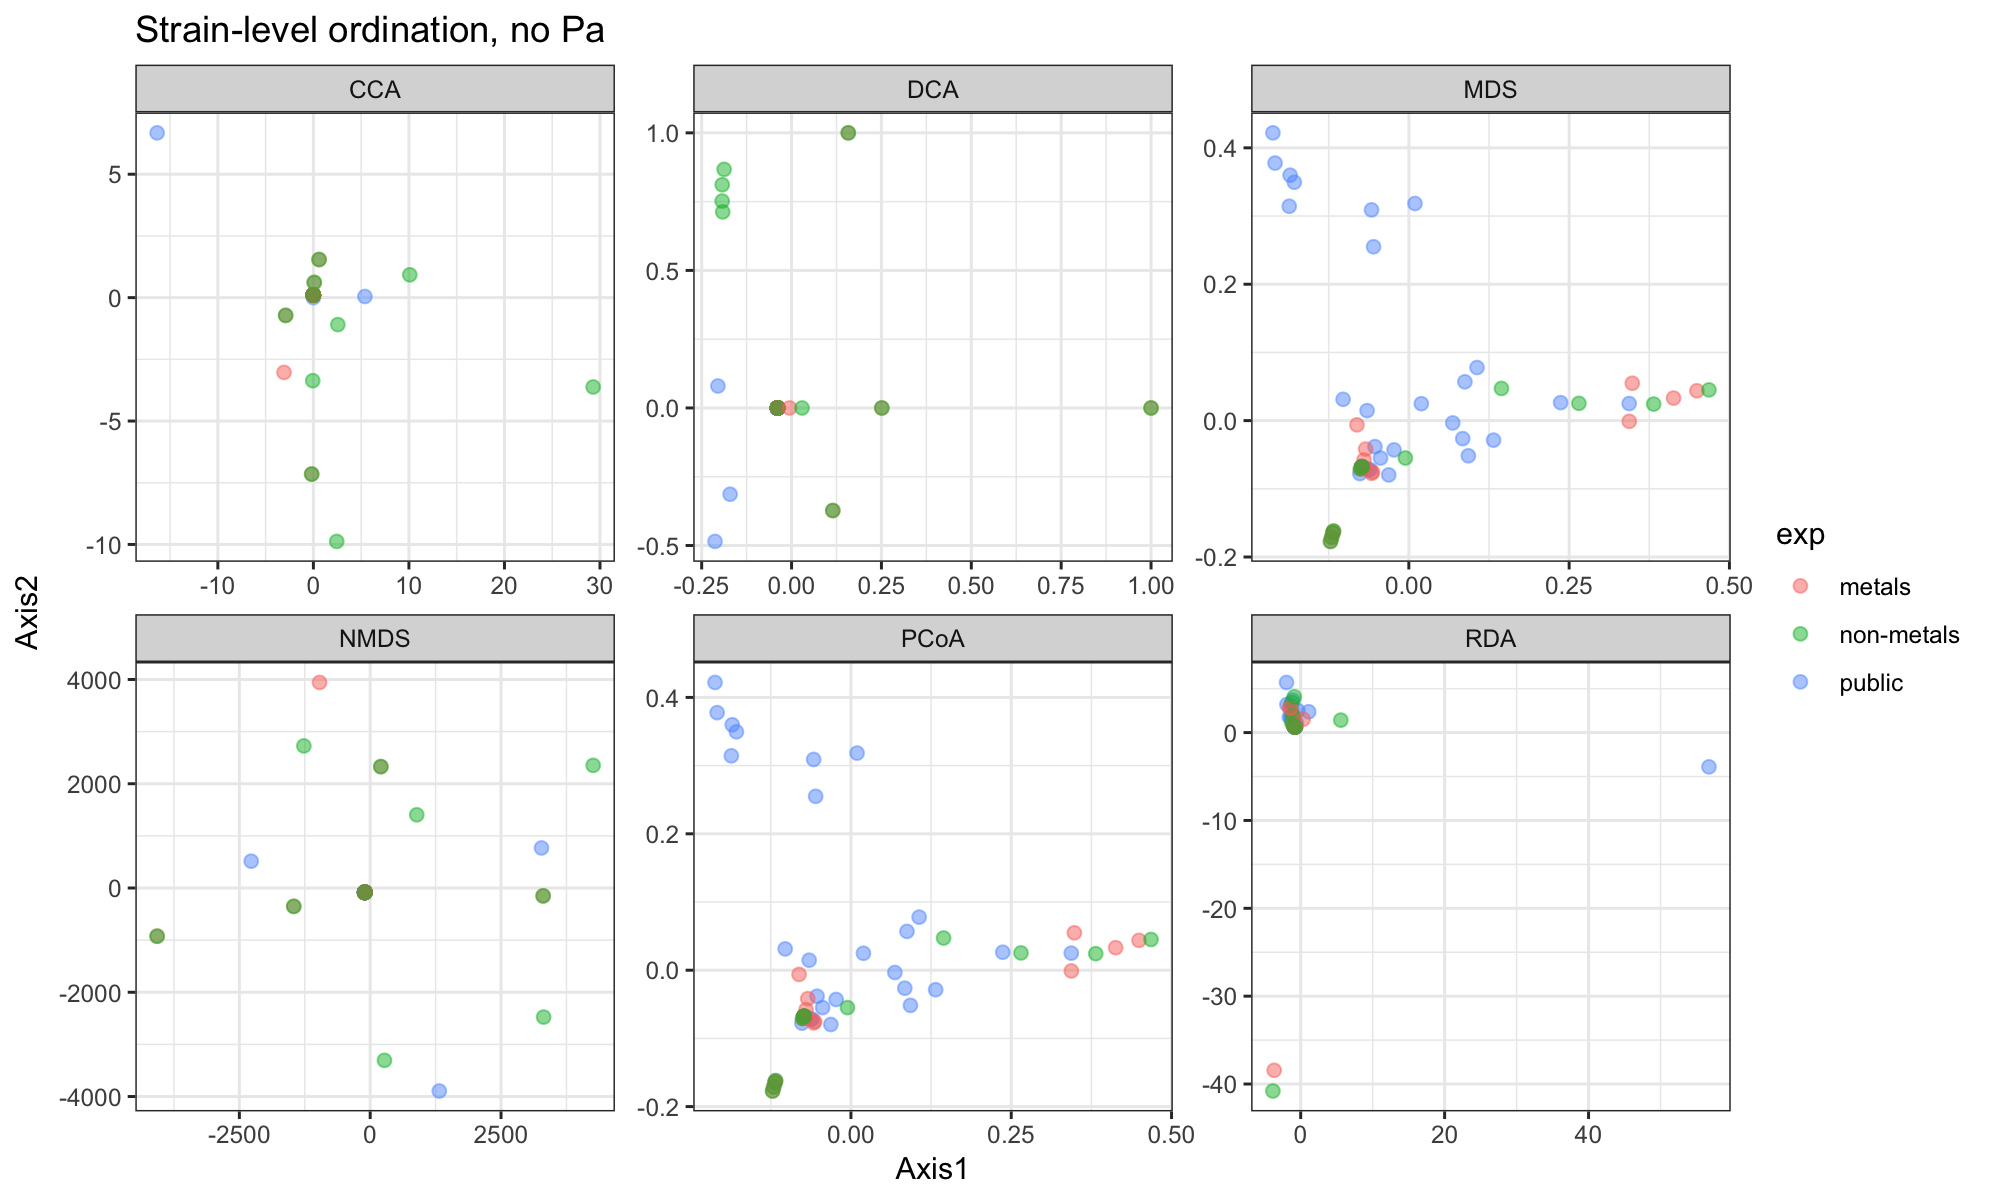

In [116]:
strain_ord_no_pa <- apply_ord(gather_physeq_no_pa)
ggplot(strain_ord_no_pa, aes(Axis1, Axis2, color= exp)) +
  geom_point(size=2, alpha = .5) +
  facet_wrap(~method, scales="free") +
  theme_bw() +
  labs(title = "Strain-level ordination, no Pa")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1463566 
Run 1 stress 0.1691291 
Run 2 stress 0.1532239 
Run 3 stress 0.1463467 
... New best solution
... Procrustes: rmse 0.001703324  max resid 0.01200442 
Run 4 stress 0.148856 
Run 5 stress 0.1498148 
Run 6 stress 0.1417999 
... New best solution
... Procrustes: rmse 0.02815437  max resid 0.1781623 
Run 7 stress 0.1505395 
Run 8 stress 0.1403152 
... New best solution
... Procrustes: rmse 0.01429309  max resid 0.09452145 
Run 9 stress 0.1466543 
Run 10 stress 0.1493266 
Run 11 stress 0.1481518 
Run 12 stress 0.1471103 
Run 13 stress 0.149393 
Run 14 stress 0.1417981 
Run 15 stress 0.1481517 
Run 16 stress 0.1452468 
Run 17 stress 0.1752309 
Run 18 stress 0.1475689 
Run 19 stress 0.1463468 
Run 20 stress 0.1421647 
*** No convergence -- monoMDS stopping criteria:
    17: stress ratio > sratmax
     3: scale factor of the gradient < sfgrmin


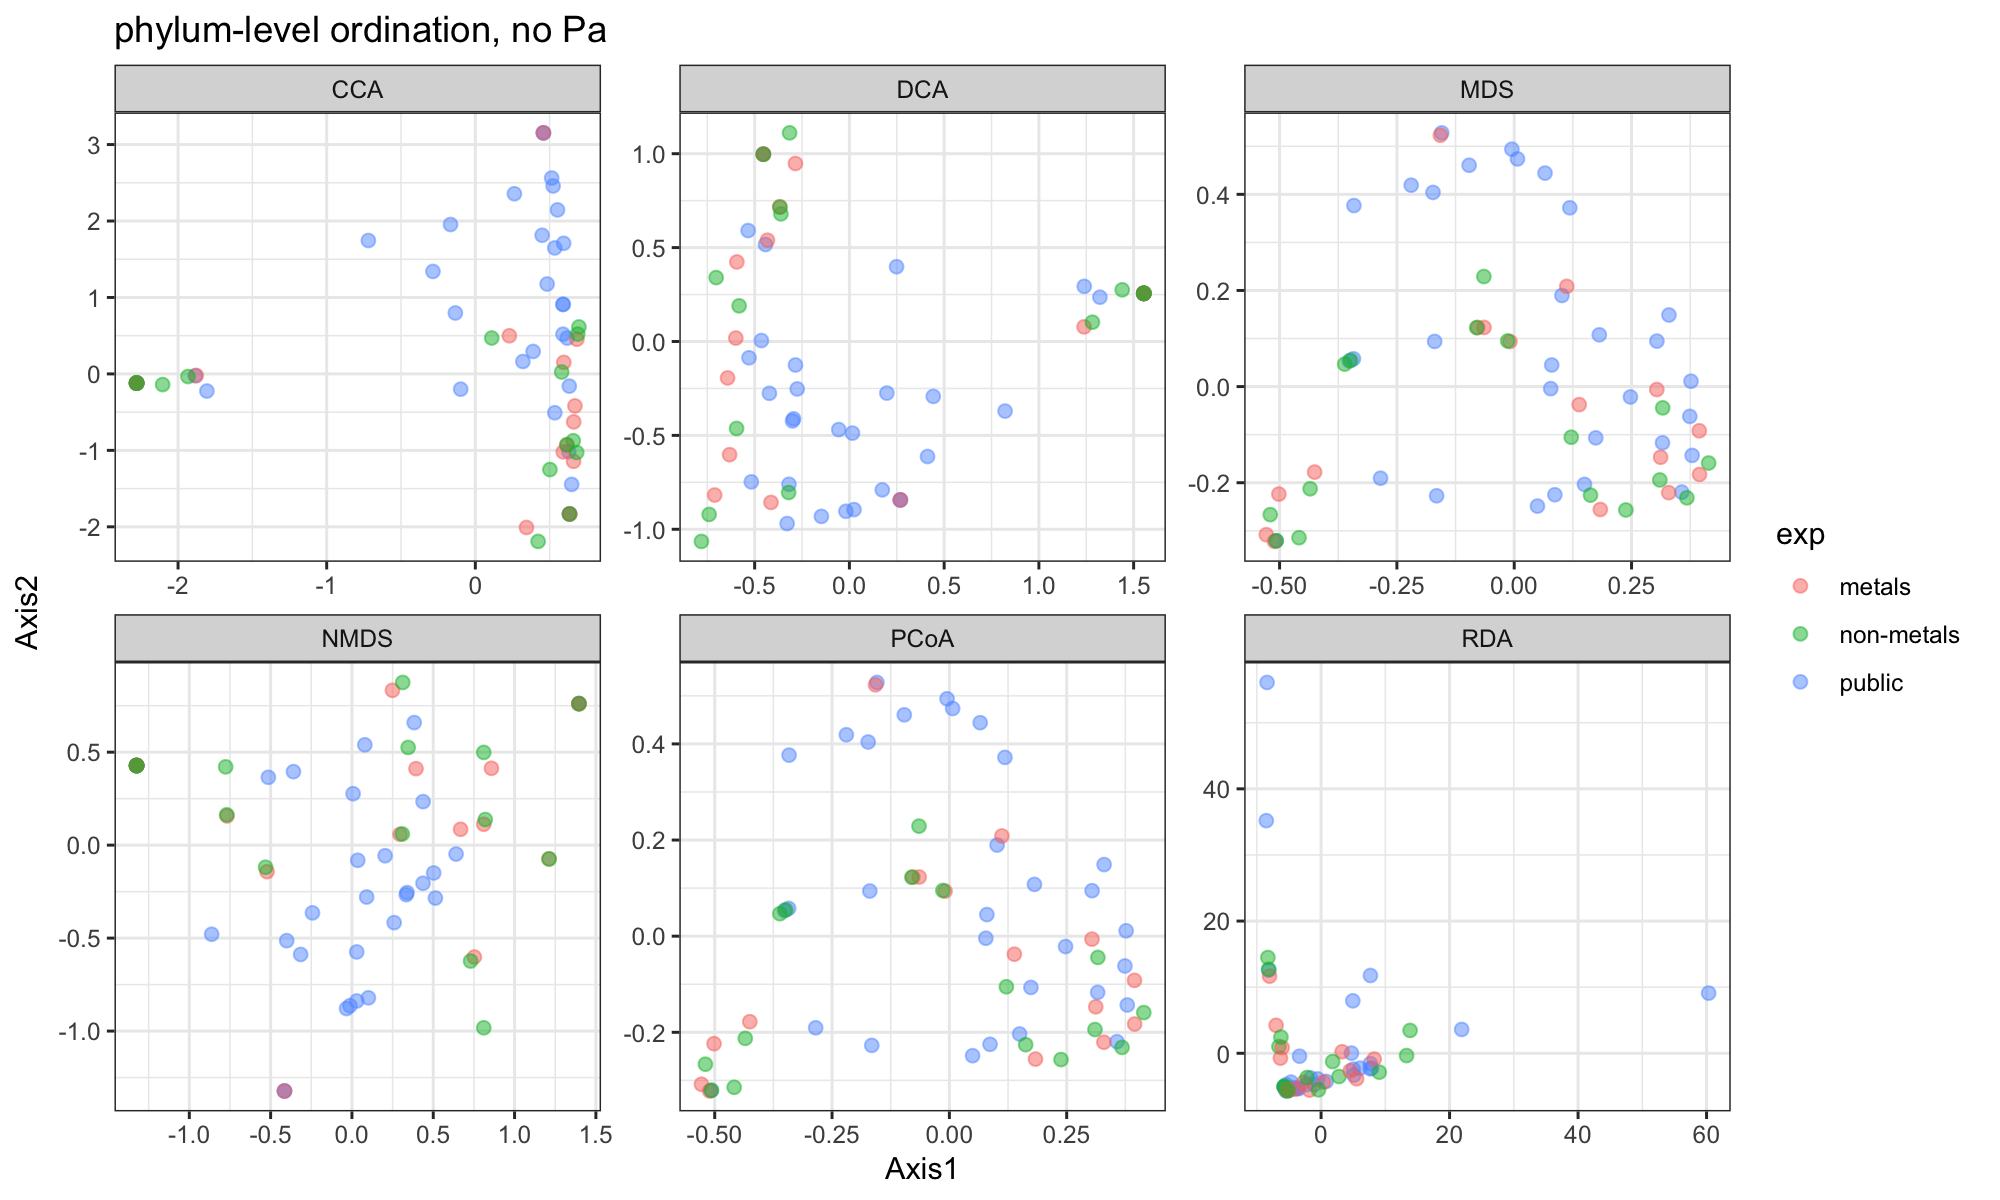

In [120]:
gather_physeq_phylum_no_pa <- aggregate_taxa(gather_physeq_no_pa, level = "phylum")
phylum_ord_no_pa <- apply_ord(gather_physeq_phylum_no_pa)
ggplot(phylum_ord_no_pa, aes(Axis1, Axis2, color= exp)) +
  geom_point(size=2, alpha = .5) +
  facet_wrap(~method, scales="free") +
  theme_bw() +
  labs(title = "phylum-level ordination, no Pa")